In [1]:
import pandas as pd

data = {'values': ['$84,835.00 ', '$42,500.00', '$10,000.00']}
df = pd.DataFrame(data)

df['values'] = df['values'].str.replace(r'[$,]', '', regex=True).str.strip().astype(float)
print(df['values'].dtype)
print(df)

float64
    values
0  84835.0
1  42500.0
2  10000.0


In [2]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5, 6], 
        'B': [10, 20, 30, 40, 50, 60],
        'C': ['X', 'Y', 'X', 'Y', 'X', 'Y']}
df = pd.DataFrame(data)

# Conditions
condition1 = df['A'] > 2
condition2 = df['B'] < 50
condition3 = df['C'] == 'X'

# Calculate conditional means
mean_A_cond1 = df.loc[condition1, 'A'].mean()
mean_B_cond2 = df.loc[condition2, 'B'].mean()
mean_A_cond3 = df.loc[condition3, 'A'].mean()

# Calculate mean with combined conditions
mean_B_cond1_and_2 = df.loc[condition1 & condition2, 'B'].mean()
mean_A_cond1_or_3 = df.loc[condition1 | condition3, 'A'].mean()

print(f"Mean of A where A > 2: {mean_A_cond1}")
print(f"Mean of B where B < 50: {mean_B_cond2}")
print(f"Mean of A where C == 'X': {mean_A_cond3}")
print(f"Mean of B where A > 2 and B < 50: {mean_B_cond1_and_2}")
print(f"Mean of A where A > 2 or C == 'X': {mean_A_cond1_or_3}")

Mean of A where A > 2: 4.5
Mean of B where B < 50: 25.0
Mean of A where C == 'X': 3.0
Mean of B where A > 2 and B < 50: 35.0
Mean of A where A > 2 or C == 'X': 3.8


In [3]:
import pandas as pd

# Sample DataFrame
data = {'col1': [1, 2, 3, 4, 5], 
        'col2': ['A', 'B', 'C', 'D', 'E']}
df = pd.DataFrame(data)

# Iterate through rows using iterrows()
for index, row in df.iterrows():
    # Access data from each row
    value1 = row['col1']
    value2 = row['col2']
    
    # Apply conditional logic
    if value1 > 3:
        print(f"Row {index}: col1 is greater than 3")
    elif value2 == 'B':
        print(f"Row {index}: col2 is equal to B")
    else:
        print(f"Row {index}: Other condition")

Row 0: Other condition
Row 1: col2 is equal to B
Row 2: Other condition
Row 3: col1 is greater than 3
Row 4: col1 is greater than 3


In [9]:
import pandas as pd

# Sample DataFrame
data = {'Marital_Status': ['Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Married'],
        'Education':      ['High School', 'College', 'High School', 'High School', 'High School', 'College', 'High School', 'High School', 'College'],
        ' Income ':       [None, 50000, None, 60000, 100, None, None, 60000, 10000]}
df = pd.DataFrame(data)
print(df)

# Define a function to replace NaN with the group's mean
def replace_with_group_mean(row, group_means):
    if pd.isnull(row[' Income ']):  # Check if ' Income ' is NaN
        return group_means[(row['Marital_Status'], row['Education'])]
    return row[' Income ']

# Calculate the mean income for each group
group_means = df.groupby(['Marital_Status', 'Education'])[' Income '].mean()
print(group_means)

# Apply the function to replace NaN values
df[' Income '] = df.apply(lambda row: replace_with_group_mean(row, group_means), axis=1)

print("--------------------------------------------------------------")
print(df)

  Marital_Status    Education   Income 
0         Single  High School       NaN
1        Married      College   50000.0
2         Single  High School       NaN
3        Married  High School   60000.0
4         Single  High School     100.0
5        Married      College       NaN
6         Single  High School       NaN
7        Married  High School   60000.0
8        Married      College   10000.0
Marital_Status  Education  
Married         College        30000.0
                High School    60000.0
Single          High School      100.0
Name:  Income , dtype: float64
--------------------------------------------------------------
  Marital_Status    Education   Income 
0         Single  High School     100.0
1        Married      College   50000.0
2         Single  High School     100.0
3        Married  High School   60000.0
4         Single  High School     100.0
5        Married      College   30000.0
6         Single  High School     100.0
7        Married  High School   60000.0
8

Selected Products Data:
   Product  Sales
0       P1    150
1       P2    300
2       P3    220
3       P4    180
4       P5     90
10      P1     50


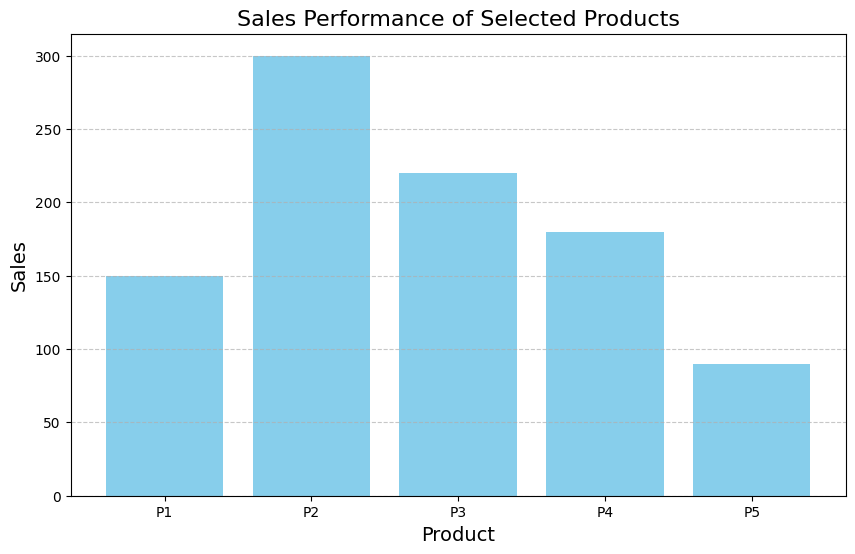

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with sales data for 10 products
data = {
    'Product': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P1'],
    'Sales': [150, 300, 220, 180, 90, 50, 400, 320, 210, 100, 50]
}
df = pd.DataFrame(data)

# Select 5 products to analyze
selected_products = df[df['Product'].isin(['P1', 'P2', 'P3', 'P4', 'P5'])]

print("Selected Products Data:")
print(selected_products)

# Plotting the sales performance of selected products
plt.figure(figsize=(10, 6))
plt.bar(selected_products['Product'], selected_products['Sales'], color='skyblue')
plt.title("Sales Performance of Selected Products", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Original DataFrame:
  Product  Sales
0      P1    150
1      P2    300
2      P3    220
3      P1    180
4      P2     90
5      P3     50
6      P4    400
7      P5    320
8      P1    100
9      P2    200

Grouped Sales Data:
  Product  Sales
0      P1    430
1      P2    590
2      P3    270
3      P4    400
4      P5    320


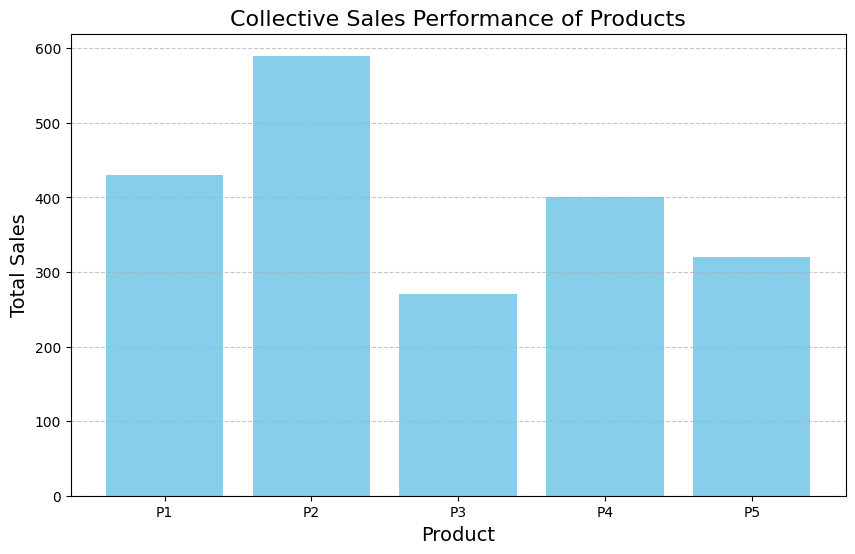

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with repeated product entries
data = {
    'Product': ['P1', 'P2', 'P3', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1', 'P2'],
    'Sales':   [150,  300,  220,  180,   90,   50,  400,   320, 100,  200]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Group by 'Product' and sum up the 'Sales'
grouped_sales = df.groupby('Product')['Sales'].sum().reset_index()

print("\nGrouped Sales Data:")
print(grouped_sales)

# Plotting the collective sales performance
plt.figure(figsize=(10, 6))
plt.bar(grouped_sales['Product'], grouped_sales['Sales'], color='skyblue')
plt.title("Collective Sales Performance of Products", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Original DataFrame:
  Product  Sales
0      P1    150
1      P2    300
2      P3    220
3      P1    180
4      P2     90
5      P3     50
6      P4    400
7      P5    320
8      P1    100
9      P2    200

Grouped Sales Data:
  Product  Sales
0      P1    430
1      P2    590
2      P3    270
3      P4    400
4      P5    320


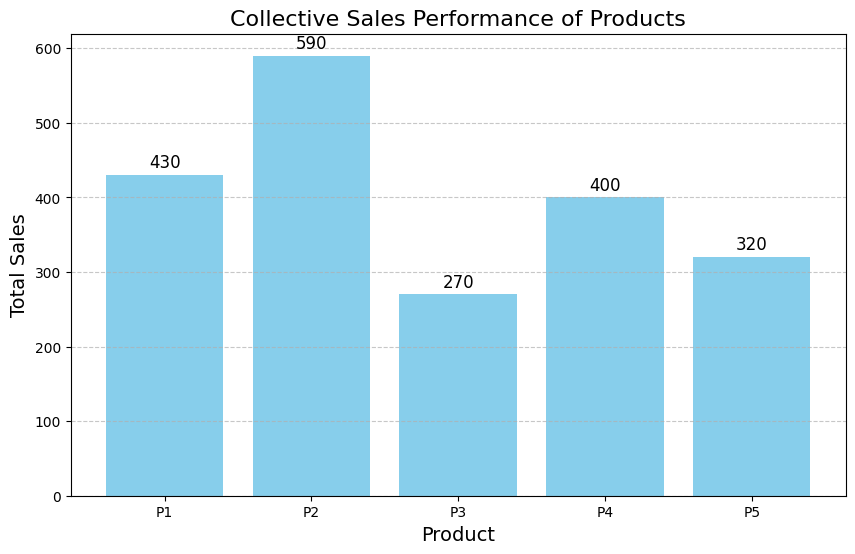

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with repeated product entries
data = {
    'Product': ['P1', 'P2', 'P3', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1', 'P2'],
    'Sales': [150, 300, 220, 180, 90, 50, 400, 320, 100, 200]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Group by 'Product' and sum up the 'Sales'
grouped_sales = df.groupby('Product')['Sales'].sum().reset_index()

print("\nGrouped Sales Data:")
print(grouped_sales)

# Plotting the collective sales performance with totals displayed on bars
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_sales['Product'], grouped_sales['Sales'], color='skyblue')

# Adding total sales numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(yval), ha='center', fontsize=12, color='black')

plt.title("Collective Sales Performance of Products", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Original DataFrame:
  Product  Sales
0      P1    150
1      P2    300
2      P3    220
3      P1    180
4      P2     90
5      P3     50
6      P4    400
7      P5    320
8      P1    100
9      P2    200

Filtered Sales Data (Only P1, P3, P5):
  Product  Sales
0      P1    430
2      P3    270
4      P5    320


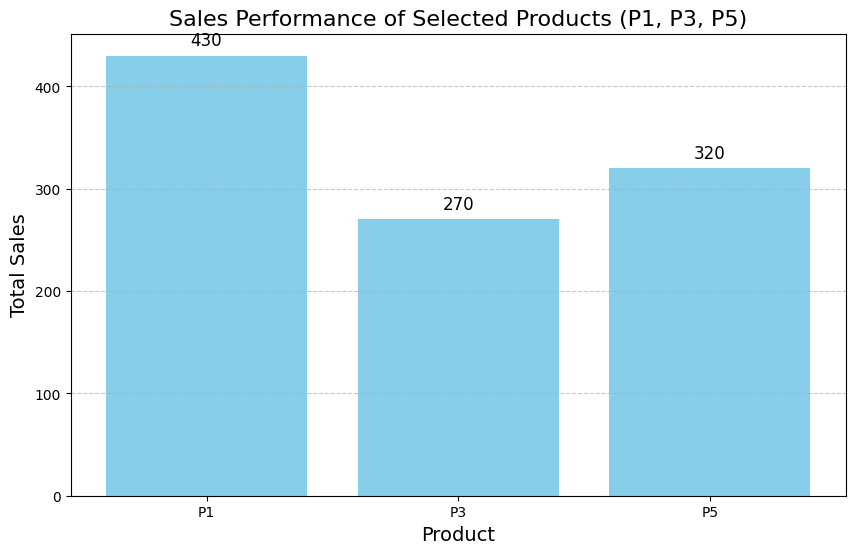

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with repeated product entries
data = {
    'Product': ['P1', 'P2', 'P3', 'P1', 'P2', 'P3', 'P4', 'P5', 'P1', 'P2'],
    'Sales': [150, 300, 220, 180, 90, 50, 400, 320, 100, 200]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Group by 'Product' and sum up the 'Sales'
grouped_sales = df.groupby('Product')['Sales'].sum().reset_index()

# Filter only the required products (P1, P3, P5)
filtered_sales = grouped_sales[grouped_sales['Product'].isin(['P1', 'P3', 'P5'])]

print("\nFiltered Sales Data (Only P1, P3, P5):")
print(filtered_sales)

# Plotting the sales performance for the filtered products
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_sales['Product'], filtered_sales['Sales'], color='skyblue')

# Adding total sales numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(yval), ha='center', fontsize=12, color='black')

plt.title("Sales Performance of Selected Products (P1, P3, P5)", fontsize=16)
plt.xlabel("Product", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Original DataFrame:
  Category  Column1  Column2  OtherColumn
0        A       10        5          100
1        B       20       15          200
2        C       30       25          300
3        A       40       35          400
4        B       50       45          500
5        C       60       55          600
6        A       70       65          700
7        B       80       75          800
8        C       90       85          900

Grouped Data with Total:
  Category  Column1  Column2  Total
0        A      120      105    225
1        B      150      135    285
2        C      180      165    345


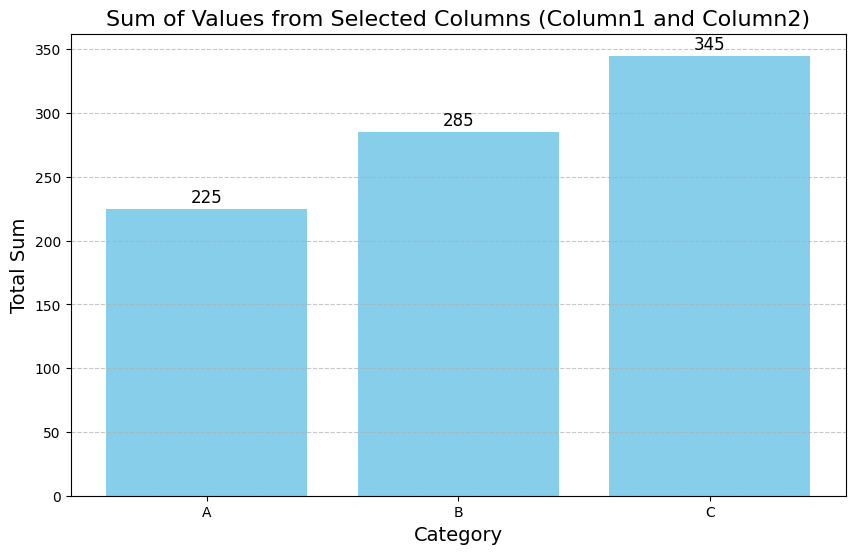

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with multiple columns
data = {
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Column1': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'Column2': [5, 15, 25, 35, 45, 55, 65, 75, 85],
    'OtherColumn': [100, 200, 300, 400, 500, 600, 700, 800, 900]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Select the column for grouping and columns to sum (Column1 and Column2)
grouped_data = df.groupby('Category')[['Column1', 'Column2']].sum().reset_index()

# Calculate the combined sum of Column1 and Column2
grouped_data['Total'] = grouped_data['Column1'] + grouped_data['Column2']

print("\nGrouped Data with Total:")
print(grouped_data)

# Plotting the bar graph for the combined sum
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['Category'], grouped_data['Total'], color='skyblue')

# Adding the totals on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, str(yval), ha='center', fontsize=12, color='black')

plt.title("Sum of Values from Selected Columns (Column1 and Column2)", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Sum", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Sum of Column1 and Column2:
Column1    60
Column2    45
dtype: int64


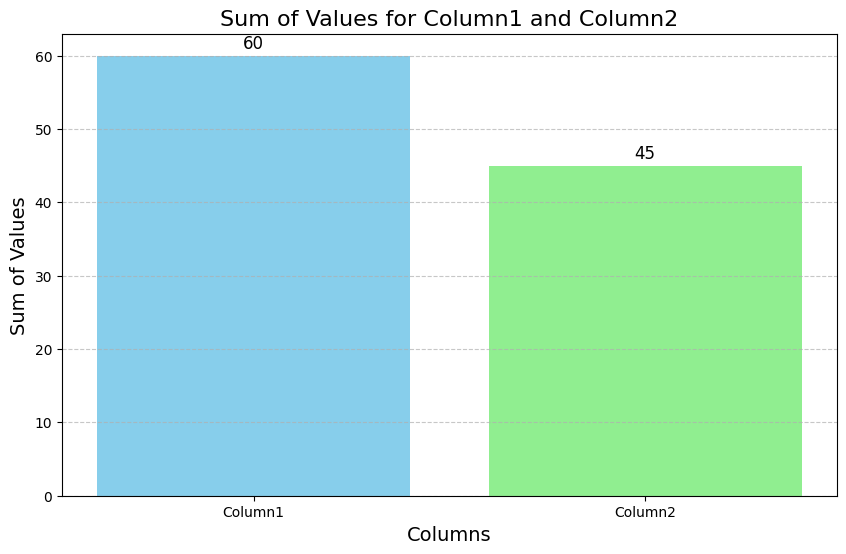

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with values for Column1 and Column2
data = {
    'Column1': [10, 20, 30],
    'Column2': [5, 15, 25]
}
df = pd.DataFrame(data)

# Calculate the sum of values for Column1 and Column2
column_sums = df.sum()

print("Sum of Column1 and Column2:")
print(column_sums)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(['Column1', 'Column2'], column_sums.values, color=['skyblue', 'lightgreen'])

# Adding total values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', fontsize=12, color='black')

plt.title("Sum of Values for Column1 and Column2", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Sum of Values", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
